# Task 2
---
## 2.1. Predictive modeling of customer bookings
### 2.1.1. Exploratory data analysis
#### 2.1.1.1. Importing Impotant Libraries and data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,precision_recall_curve
from sklearn.metrics import roc_curve,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


#### 2.1.1.2. Exploring Dataset

In [3]:
df.shape

(50000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

To provide more context, below is a more detailed data description, explaining exactly what each column means:
- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)

- `booking_complete` = flag indicating if the customer completed the booking

In [5]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


#### 2.1.1.2. Categorical Features Transformations

First, we will transform the **flight_day** column to ordinal column from **1 to 7** indicating day of the week where **1** is **Monday** and **7** is **Sunday**.

In [6]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [7]:
df["flight_day"] = df["flight_day"].map({"Mon": 1,"Tue": 2,"Wed": 3,"Thu": 4,"Fri": 5,"Sat": 6,"Sun": 7})

In [8]:
LE = LabelEncoder()

Then, we Transform we will transform the **sales_channel** column to categorical where **0 indicates Internet** and **1 indicates Mobile** , while for **trip_type** **0 indicates CircleTrip**, **1 indicates OneWay**, and **2 indicates RoundTrip**.

In [9]:
df['sales_channel'] = LE.fit_transform(df['sales_channel'])
LE.classes_

array(['Internet', 'Mobile'], dtype=object)

In [10]:
df['trip_type'] = LE.fit_transform(df['trip_type'])
LE.classes_

array(['CircleTrip', 'OneWay', 'RoundTrip'], dtype=object)

#### 2.1.1.2. Feature Visualization
##### 2.1.1.2.1 Categorical features visualization

In [11]:
def barchart_stacked_perc(df,x,hue,figsize_,title_,rot_,xlabel_,ylabel_,legend_fontsize,annot_fontsize,xticklabels=None):
    plot_data = df.groupby(x)[hue].value_counts(normalize=True).mul(100).rename('perc').reset_index()
    plot_data = plot_data.pivot(columns=hue,index=x,values='perc').fillna(0)
    ax = plot_data.plot(kind='bar',figsize=figsize_,rot=rot_,stacked=True,edgecolor='k')
    for p in ax.patches:
        height = p.get_height()
        width = p.get_width()
        x,y = p.get_xy()
        if height >= 0.1:
                plt.annotate(f'{height.round(1)}%',xy=(x + width/2, y + height/2),ha='center',va='center',size=annot_fontsize)
    plt.legend(['Incomplete','Complete'],loc='best',fontsize=legend_fontsize)
    modified_xlabel = x.astype(str)
    plt.xlabel(xlabel_)
    plt.ylabel(ylabel_)
    plt.title(title_)
    if xticklabels:
        ax.set_xticks(range(len(xticklabels)))
        ax.set_xticklabels(xticklabels)
    plt.show()
def bar_plot_prec_above(dataset,feature,perc_x_shift,figsize_):
    plt.figure(figsize=figsize_)
    ax = sns.barplot(x=dataset[feature].value_counts().index,
                     y=(dataset[feature].value_counts() / dataset[feature].count()) * 100,
                     edgecolor='k',order=dataset[feature].value_counts().index)
    bars_height = [bar.get_height().round(2) for bar in ax.patches]
    bars_width = [bar.get_width() / 2 for bar in ax.patches]
    plt.yticks([x for x in range(0, 110, 10)])
    for i in range(len(bars_height)):
        plt.text(x=i-perc_x_shift, y=bars_height[i] + 0.5, s=f'{bars_height[i]}%')
    if len(dataset[feature].value_counts()) > 1:
        return ax
    else:
        return None
plt.show()

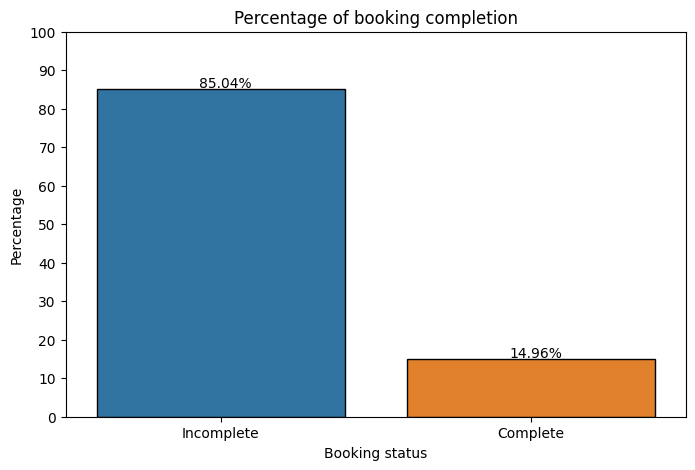

In [12]:
ax = bar_plot_prec_above(df,'booking_complete',0.07,(8,5))
ax.set(xticklabels=['Incomplete','Complete'],xlabel='Booking status',ylabel='Percentage',title='Percentage of booking completion')
plt.show()

The target value is highly unbalanced in distribution as more than 85% of the bookings is not completed.

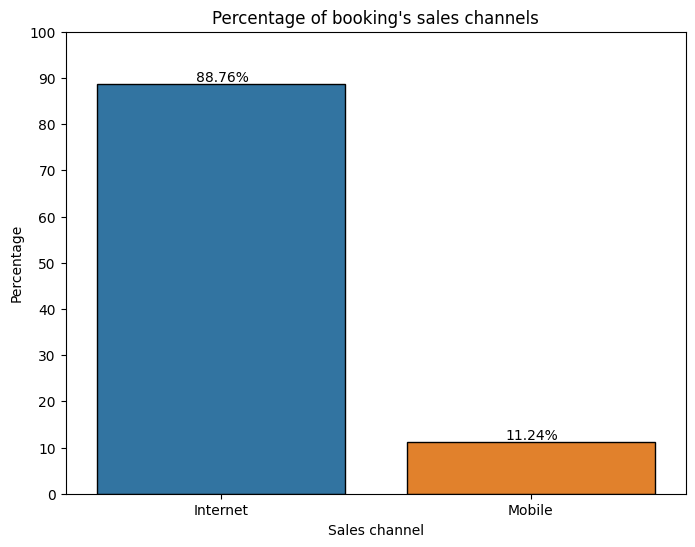

In [13]:
ax = bar_plot_prec_above(df,'sales_channel',0.08,(8,6))
ax.set(xticklabels=['Internet', 'Mobile'],xlabel='Sales channel',ylabel='Percentage',title="Percentage of booking's sales channels")
plt.show()

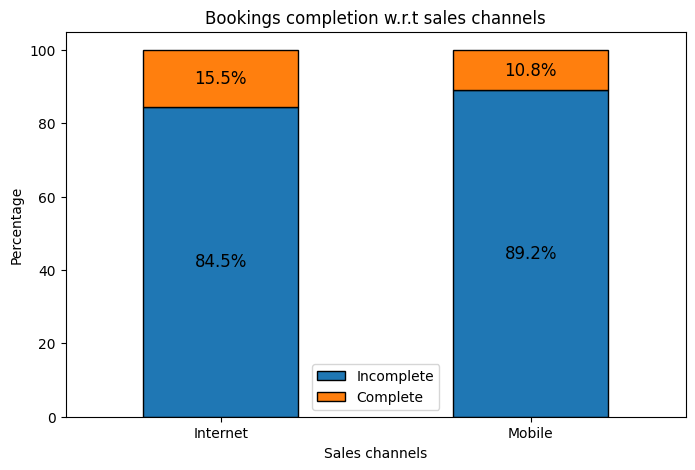

In [14]:
barchart_stacked_perc(df,'sales_channel','booking_complete',(8,5),'Bookings completion w.r.t sales channels',
                      0,'Sales channels','Percentage',10,12,xticklabels=['Internet', 'Mobile'])

**88.76%** from the customers used **Internet Website** to make bookings with **15.5%** of them **complete** their booking, while **11.24%** used the **Mobile App** with **10.8%** of them **complete** their booking

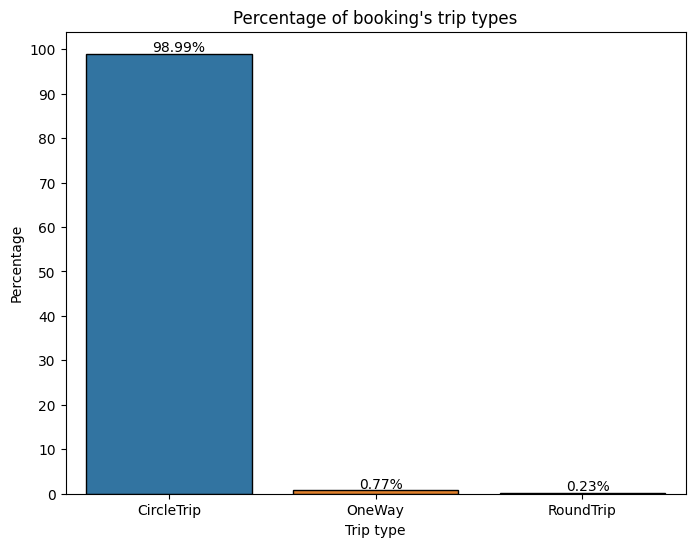

In [15]:
ax = bar_plot_prec_above(df,'trip_type',0.08,(8,6))
ax.set(xticklabels=['CircleTrip', 'OneWay', 'RoundTrip'],xlabel='Trip type',ylabel='Percentage',title="Percentage of booking's trip types")
plt.show()

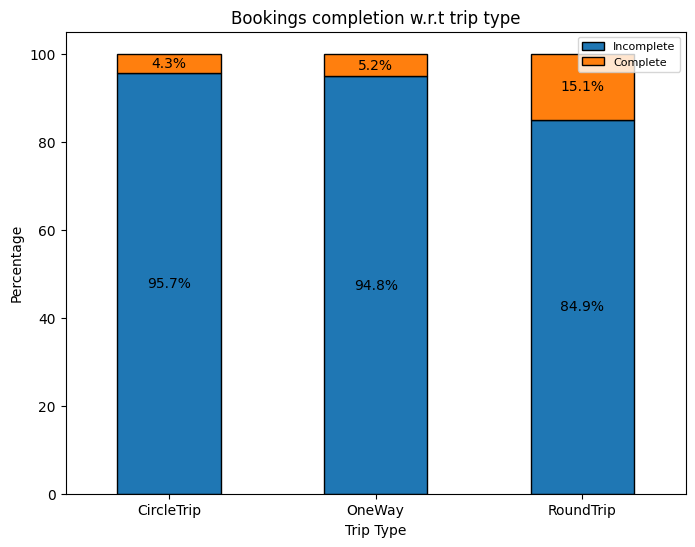

In [16]:
barchart_stacked_perc(df,'trip_type','booking_complete',(8,6),'Bookings completion w.r.t trip type',
                      0,'Trip Type','Percentage',8,10,xticklabels=['CircleTrip', 'OneWay', 'RoundTrip'])

Around **99%** from the customers booked a **Circle Trip** with only **4.3%** of them **complete** their booking, while **0.77%** booked a **One Way Trip** with only **5.2%** of them **complete** their booking, and **0.23%** booked a **Round Trip** with  **15.1%** of them **complete** their booking

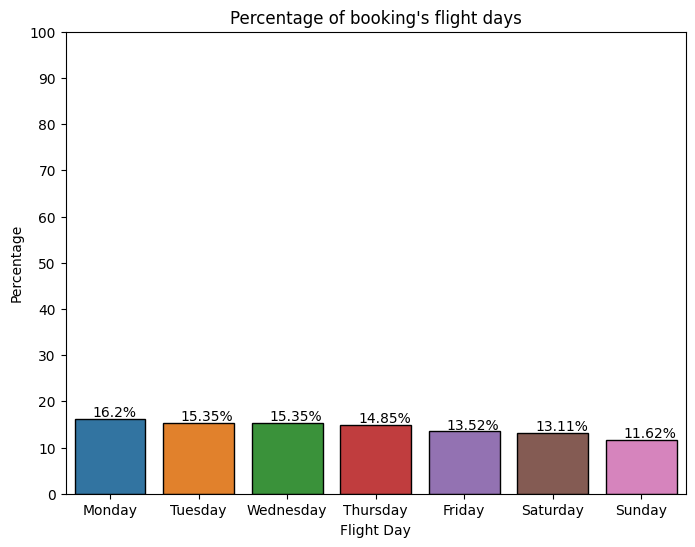

In [17]:
ax = bar_plot_prec_above(df,'flight_day',0.2,(8,6))
ax.set(xticklabels=['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday'],
       xlabel='Flight Day',ylabel='Percentage',title="Percentage of booking's flight days")
plt.show()

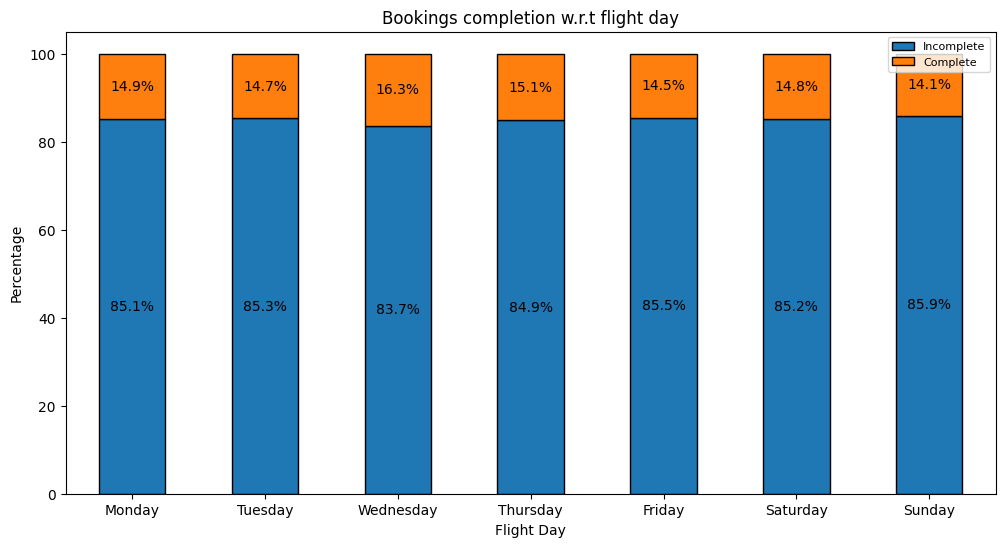

In [18]:
barchart_stacked_perc(df,'flight_day','booking_complete',(12,6),'Bookings completion w.r.t flight day',
                      0,'Flight Day','Percentage',8,10,xticklabels=['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday'])

The booking increases in the begining of the weekdays with slight decrease in weekends, while percentage of bookings' completion is almost equal in all weekdays. 

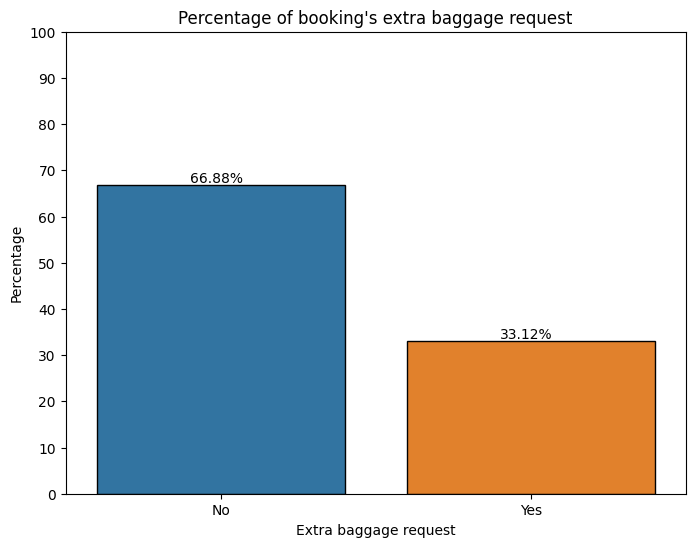

In [19]:
ax = bar_plot_prec_above(df,'wants_extra_baggage',0.1,(8,6))
ax.set(xticklabels=['No','Yes'],
       xlabel='Extra baggage request',ylabel='Percentage',title="Percentage of booking's extra baggage request")
plt.show()

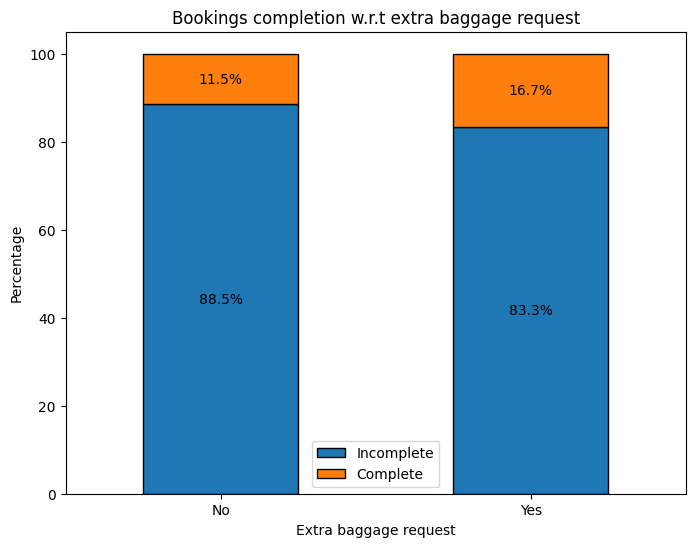

In [20]:
barchart_stacked_perc(df,'wants_extra_baggage','booking_complete',(8,6),'Bookings completion w.r.t extra baggage request',
                      0,'Extra baggage request','Percentage',10,10,xticklabels=['No','Yes'])

**33.12%** from the customers booked with **Extra baggage request** with  **16.7%** of them **complete** their booking, while **66.88%** booked with **regular baggage** with **11.5%** of them **complete** their booking.

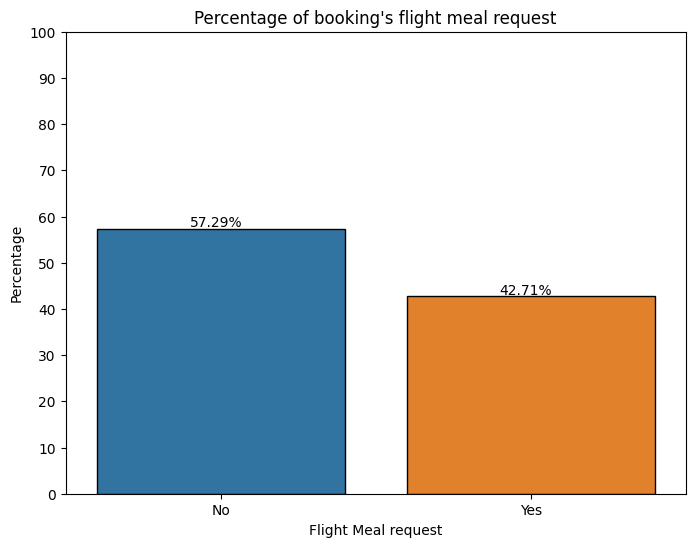

In [21]:
ax = bar_plot_prec_above(df,'wants_in_flight_meals',0.1,(8,6))
ax.set(xticklabels=['No','Yes'],
       xlabel='Flight Meal request',ylabel='Percentage',title="Percentage of booking's flight meal request")
plt.show()

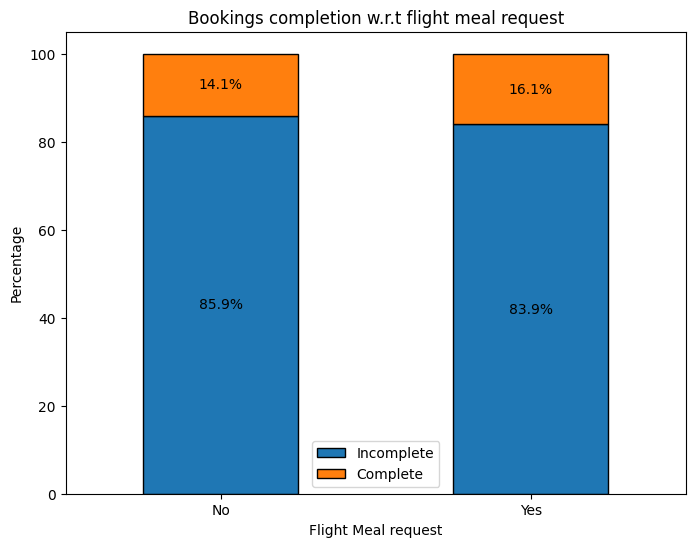

In [22]:
barchart_stacked_perc(df,'wants_in_flight_meals','booking_complete',(8,6),'Bookings completion w.r.t flight meal request',
                      0,'Flight Meal request','Percentage',10,10,xticklabels=['No','Yes'])

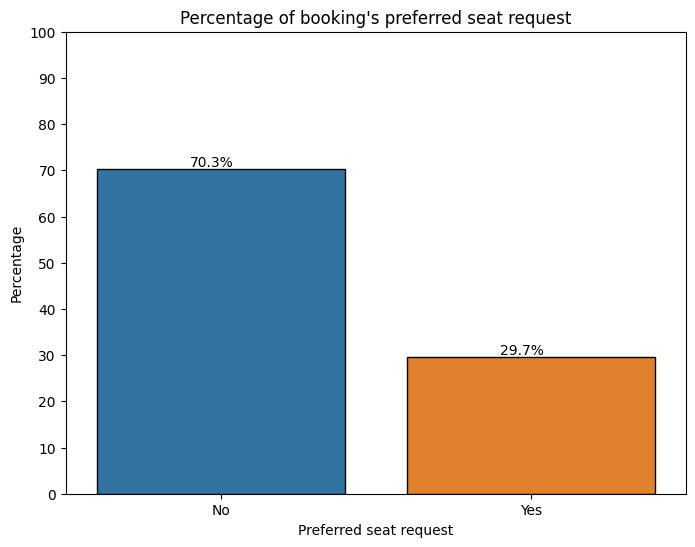

In [23]:
ax = bar_plot_prec_above(df,'wants_preferred_seat',0.1,(8,6))
ax.set(xticklabels=['No','Yes'],
       xlabel='Preferred seat request',ylabel='Percentage',title="Percentage of booking's preferred seat request")
plt.show()

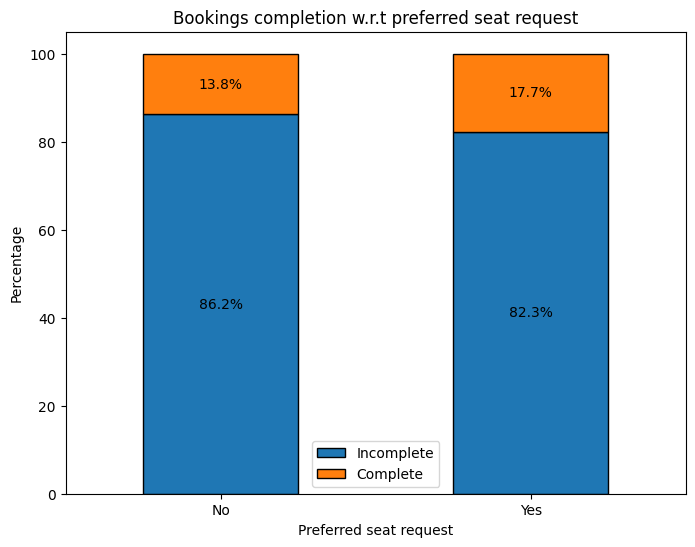

In [24]:
barchart_stacked_perc(df,'wants_preferred_seat','booking_complete',(8,6),'Bookings completion w.r.t preferred seat request',
                      0,'Preferred seat request','Percentage',10,10,xticklabels=['No','Yes'])

Around **70.3%** of the customers booked their flights without stating a **Preferred seat** with  **13.8%** of them **complete** their booking, while **29.7%** stated their **Preferred seat** with **17.7%** of them **complete** their booking.

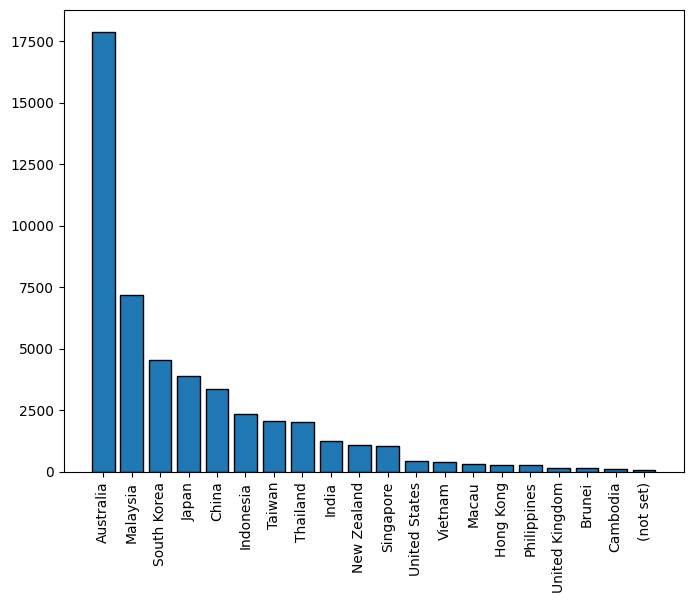

In [25]:
plt.figure(figsize=(8,6))
plt.bar(x=df['booking_origin'].value_counts().keys()[:20],height=df['booking_origin'].value_counts()[:20],edgecolor='black')
plt.xticks(rotation=90)
plt.show()

**Australia** is the origin of majority of bookings made.

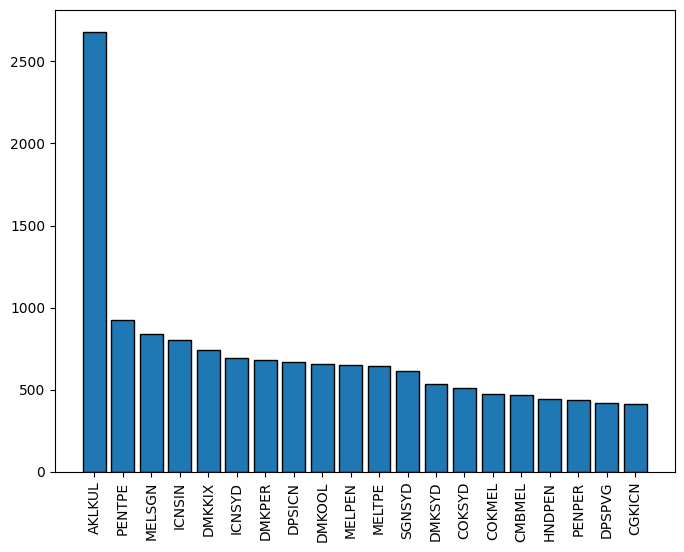

In [26]:
plt.figure(figsize=(8,6))
plt.bar(x=df['route'].value_counts().keys()[:20],height=df['route'].value_counts()[:20],edgecolor='black')
plt.xticks(rotation=90)
plt.show()

**AKLKUL** is the most taken route of the flights.

##### 2.1.1.2.1 Numerical features visualization

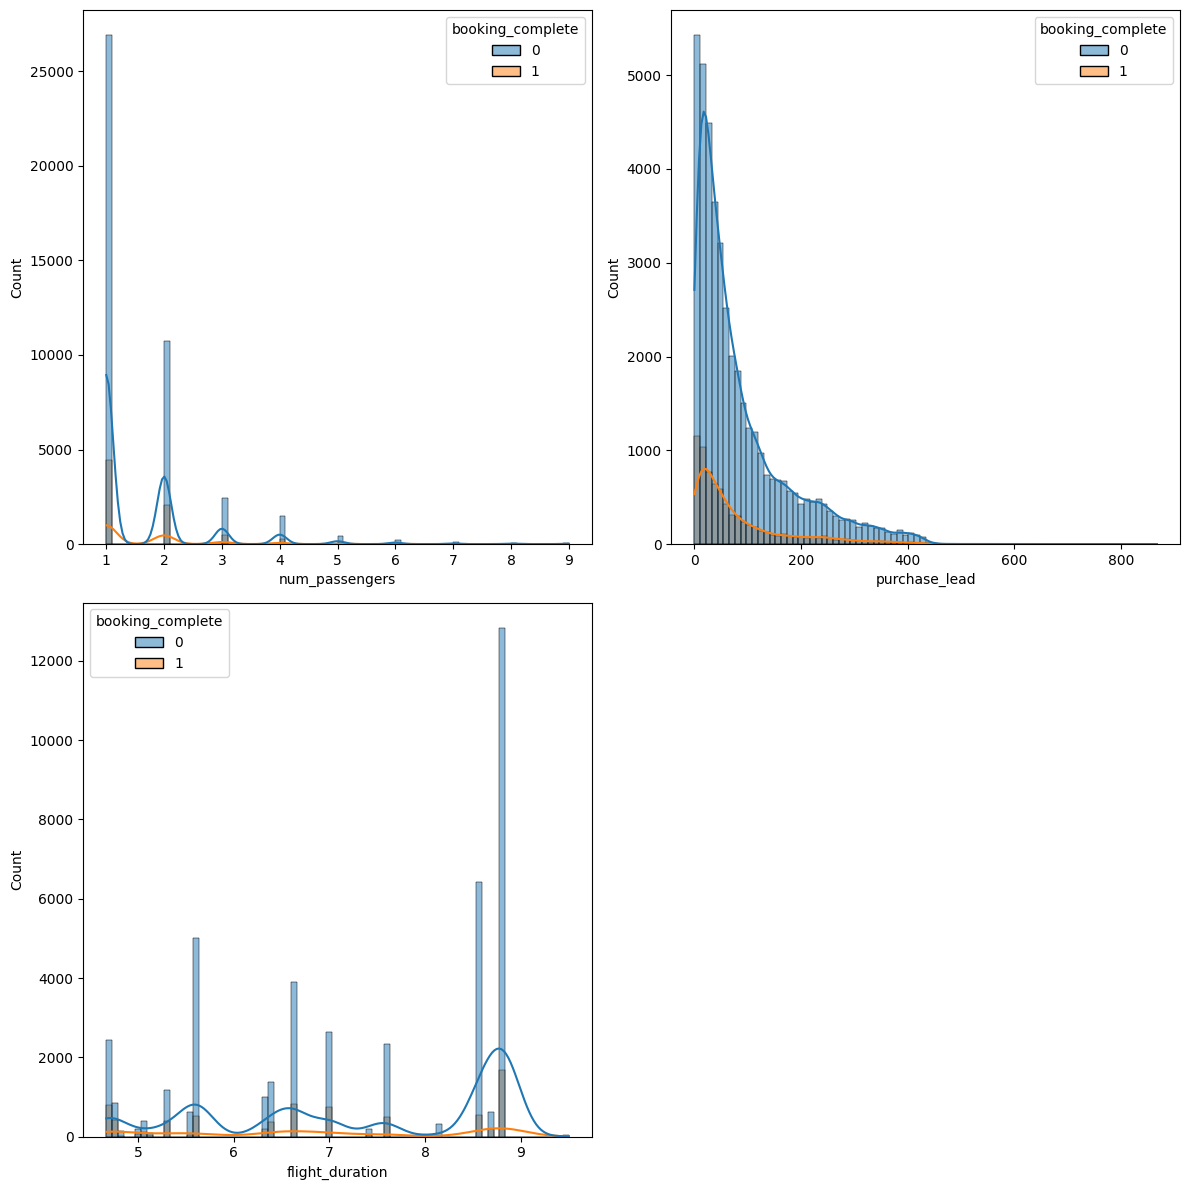

In [27]:
numerical_cols = ['num_passengers','purchase_lead','flight_duration']
fig, ax = plt.subplots(2,2,figsize=(12,12))
ax = ax.flatten()
for i in range(len(numerical_cols)):
    sns.histplot(data=df,x=numerical_cols[i],hue='booking_complete',legend=True,bins=80,ax=ax[i],kde=True)
ax[-1].set_visible(False)
plt.tight_layout()
plt.show()

Distribution of passengers number indicates that majority of customers whose booking is verified are between 1 passenger and 3 passengers with less verfied bookings for passengers more than 3, while for the purchase lead it appears that the column has inconvenient values as the purchase lead cann't be more than 365 days (1 year) so those rows with more than 365 days purchase lead period should be removed, and for the flight duration the distribution appears to be convenient even it is not normally distributed. 

In [28]:
#Remove purchase_lead outliers
df = df[df['purchase_lead'] <= 365]
print('The new shape of dataframe is:',df.shape)
print(f'{50000 - len(df)} Rows removed.')

The new shape of dataframe is: (49162, 14)
838 Rows removed.


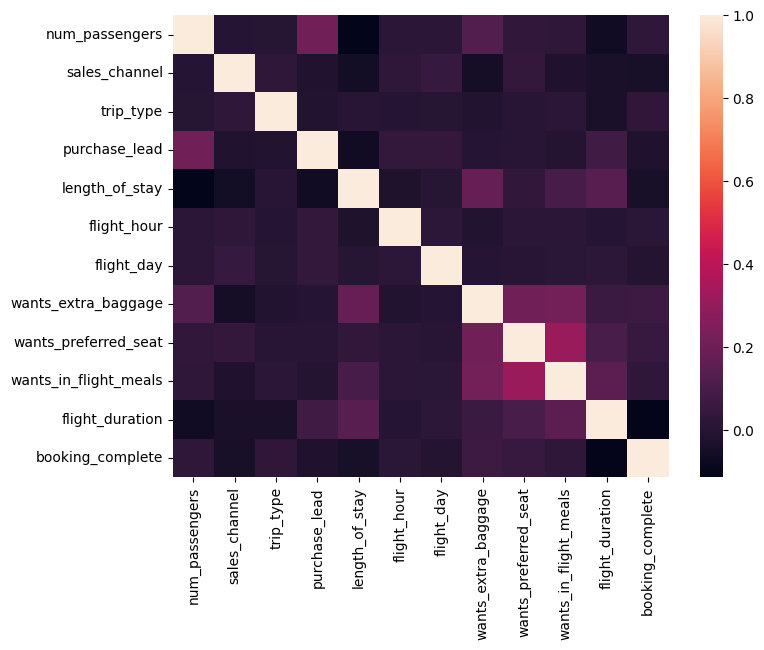

In [29]:
CMF = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(CMF)
plt.show()

### 2.1.2. Modelling
#### 2.1.2.1 Splitting Data

We are going to drop **Booking origin** column and **route** of the flight as those columns doesn't affect the target column.

In [30]:
X = df.drop(columns=['booking_complete','booking_origin','route'])
y = df['booking_complete']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42,shuffle=True,stratify=y)
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_trian shape:',y_train.shape)
print('y_test shape:',y_test.shape)

X_train shape: (32938, 11)
X_test shape: (16224, 11)
y_trian shape: (32938,)
y_test shape: (16224,)


#### 2.1.2.2 Classification Algorithm : Random Forest

In [32]:
param_grid = {'n_estimators':[25,50,75,100,125],'criterion':['gini','entropy', 'log_loss'],
              'max_depth':[int(x) for x in np.linspace(10, 110, num = 11)],'bootstrap' : [True, False],
             'max_features':['sqrt','auto'],'min_samples_split' : [2, 5, 10],'min_samples_leaf': [1, 2, 4]}
RSCV = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),param_distributions=param_grid,cv=4,scoring='f1',n_iter=15,n_jobs=-1)
RSCV.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['sqrt', 'auto'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [25, 50, 75, 100, 125]},
                   scoring='f1')

In [33]:
RSCV.best_estimator_

RandomForestClassifier(bootstrap=False, criterion='log_loss', max_depth=40,
                       max_features='auto', n_estimators=75, random_state=42)

#### 2.1.2.3 Evalution Metrics

In [34]:
y_pred_test = RSCV.predict(X_test)
y_pred_train = RSCV.predict(X_train)

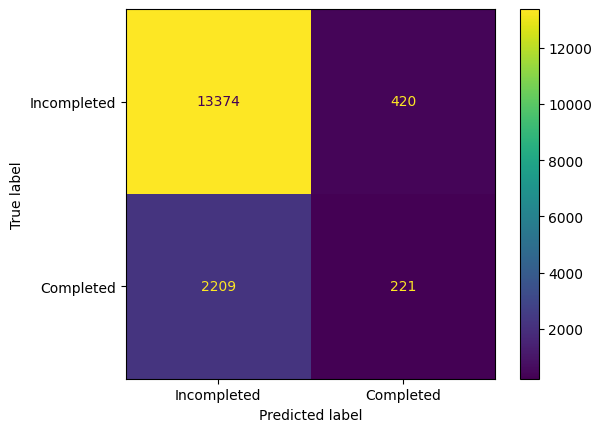

In [35]:
CMF = confusion_matrix(y_test,y_pred_test)
CMF_Display = ConfusionMatrixDisplay(CMF)
CMF_Display.plot()
plt.xticks(ticks=[0,1],labels=['Incompleted','Completed'])
plt.yticks(ticks=[0,1],labels=['Incompleted','Completed'])
plt.show()

In [36]:
print(f'precision {precision_score(y_train,y_pred_train)}, and recall {recall_score(y_train,y_pred_train)} on train set.')
print(f'F1_Score {f1_score(y_train,y_pred_train)}, and accuracy {accuracy_score(y_train,y_pred_train)} on train set.')
print('-------------------------------------------------------------------------------------------------------------------')
print(f'precision {precision_score(y_test,y_pred_test)}, and recall {recall_score(y_test,y_pred_test)} on test set.')
print(f'F1_Score {f1_score(y_test,y_pred_test)}, and accuracy {accuracy_score(y_test,y_pred_test)} on test set.')
print(f'ROC Area under curve {roc_auc_score(y_test,y_pred_test)} on test set.')

precision 1.0, and recall 0.9977696674776967 on train set.
F1_Score 0.9988835887546941, and accuracy 0.999666039225211 on train set.
-------------------------------------------------------------------------------------------------------------------
precision 0.34477379095163807, and recall 0.09094650205761316 on test set.
F1_Score 0.1439270595897102, and accuracy 0.8379561143984221 on test set.
ROC Area under curve 0.5302492405894852 on test set.


In [37]:
RFC = RandomForestClassifier(bootstrap=False, max_depth=70, max_features='auto',
                       min_samples_leaf=2, min_samples_split=5, n_estimators=25,
                       random_state=42)
RFC.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=70, max_features='auto',
                       min_samples_leaf=2, min_samples_split=5, n_estimators=25,
                       random_state=42)

In [38]:
Importance = pd.DataFrame({"feature_names": RFC.feature_names_in_, "importances": RFC.feature_importances_}).sort_values(by='importances',ascending=False).reset_index(drop=True)
Importance

,feature_names,importances
0,purchase_lead,0.275894
1,flight_hour,0.186721
2,length_of_stay,0.173391
3,flight_duration,0.133573
4,flight_day,0.113057
5,num_passengers,0.052768
6,wants_in_flight_meals,0.023092
7,wants_extra_baggage,0.016752
8,wants_preferred_seat,0.012503
9,sales_channel,0.010526


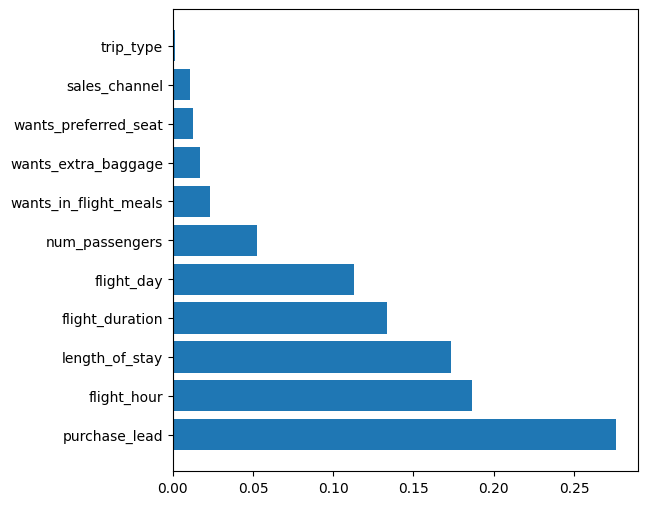

In [39]:
plt.figure(figsize=(6,6))
plt.barh(y=Importance['feature_names'],width=Importance['importances'])
plt.savefig(fname='importance.jpeg')
plt.show()

------
This was the end of the tasks of British Airways virtual training, But it is obvious that the model is not preforming well and this is mainly becuase of highly imbalanced data so the training model fails predict the minority class correctly, therefore we will continue to work on special techniques to solve this issue.

## 2. Re-Sampling Dataset
### 2.1. Oversampling

In [40]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

In [41]:
ROS = RandomOverSampler(random_state=42)
ROS.fit(X_train, y_train)
X_train_oversampled, y_train_oversampled = ROS.fit_resample(X_train, y_train)

In [83]:
RFC = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=4,
                       max_features='sqrt', n_estimators=10, random_state=42,min_samples_split=30)
RFC.fit(X_train_oversampled, y_train_oversampled)

RandomForestClassifier(max_depth=4, min_samples_split=30, n_estimators=10,
                       random_state=42)

In [84]:
y_pred_os_train = RFC.predict(X_train_oversampled)
y_pred_test = RFC.predict(X_test)
print(f'precision {precision_score(y_train_oversampled,y_pred_os_train)}, and recall {recall_score(y_train_oversampled,y_pred_os_train)} on train set.')
print(f'F1_Score {f1_score(y_train_oversampled,y_pred_os_train)}, and accuracy {accuracy_score(y_train_oversampled,y_pred_os_train)} on train set.')
print('-------------------------------------------------------------------------------------------------------------------')
print(f'precision {precision_score(y_test,y_pred_test)}, and recall {recall_score(y_test,y_pred_test)} on test set.')
print(f'F1_Score {f1_score(y_test,y_pred_test)}, and accuracy {accuracy_score(y_test,y_pred_test)} on test set.')
print(f'ROC Area under curve {roc_auc_score(y_test,y_pred_test)} on test set.')

precision 0.6429714285714285, and recall 0.6026565735913733 on train set.
F1_Score 0.6221616042465349, and accuracy 0.6340069985003214 on train set.
-------------------------------------------------------------------------------------------------------------------
precision 0.23643603782976605, and recall 0.5864197530864198 on test set.
F1_Score 0.3369989357928343, and accuracy 0.6544008875739645 on test set.
ROC Area under curve 0.6263982193009306 on test set.


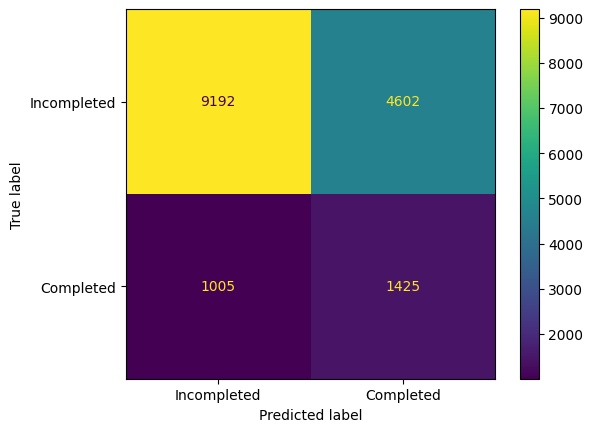

In [87]:
CMF = confusion_matrix(y_test,y_pred_test)
CMF_Display = ConfusionMatrixDisplay(CMF)
CMF_Display.plot()
plt.xticks(ticks=[0,1],labels=['Incompleted','Completed'])
plt.yticks(ticks=[0,1],labels=['Incompleted','Completed'])
plt.show()

After Oversampling and Random Forest hyperparameter tuning in order to decrease overfitting of algorithm on training data, This is the best Random forest we could obtain.
The model have partially solved our problem that we couldn't predict the positive class correctly, as it predicted it 1425 times from about 2430 times we have that class (58.64%) which is a significant increase in performance as the previous model only predicted 167 times correctly, But also there is a decrease in ability of model to predict the negative class correctly but it is acceptable for us becuase the overall performance is increasing. 

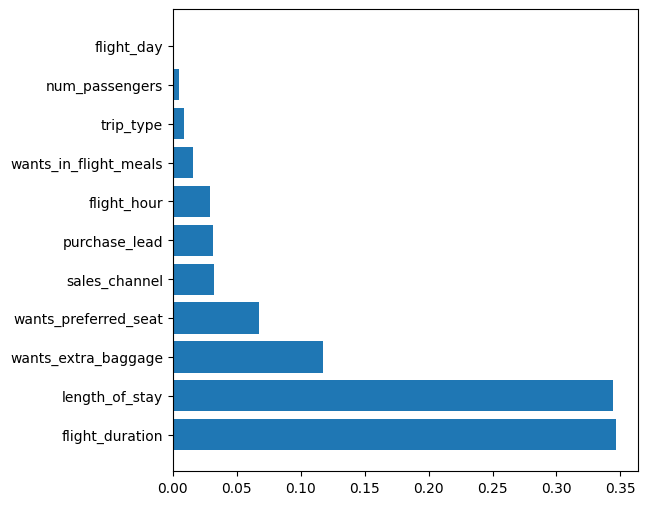

In [86]:
Importance = pd.DataFrame({"feature_names": RFC.feature_names_in_, "importances": RFC.feature_importances_}).sort_values(by='importances',ascending=False).reset_index(drop=True)
plt.figure(figsize=(6,6))
plt.barh(y=Importance['feature_names'],width=Importance['importances'])
plt.savefig(fname='importance.jpeg')
plt.show()

After oversampling of the dataset and hyperparameter tuning the model this is the new feature importance values of the tuned model, which appears to be more resonable that the previous one as the most important features seems to be reasonable to affect the verification process of the booking more than the previous ones.